<a href="https://colab.research.google.com/gist/coryroyce/ca66729e16564343c3e0830f19024dba/210913_customer_churn_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Modeling - Data Cleaning
9/28/2021
Cory Randolph

Goal:

Use an open source data set related to customer churn in order to practice data cleaning techniqies and data pre-processing for machine learning models.

Notes:

Data set comes from the open source [Kaggle - Telco Data Set](https://www.kaggle.com/blastchar/telco-customer-churn).

Some ideas of what to clean or plot came from [iabhishekbhardwaj's notebook](https://www.kaggle.com/iabhishekbhardwaj/telco-customer-churn/notebook)

# Import Packages

Load the required packages used for data cleaning and pre-processing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -q kaggle

# Clear output for this cell
from IPython.display import clear_output
clear_output()

# Data Loading

Load the data from the hosted csv file

Use google colab's files module to upload a file, then upload the locally stored csv file of the churn data.


In [5]:
# Un comment below 2 lines to load the csv file locally
# from google.colab import files
# files.upload()
# df_raw = pd.read_csv('churn_data.csv')

url = 'https://raw.githubusercontent.com/coryroyce/customer_churn_modeling/main/data/churn_data.csv'
df_raw = pd.read_csv(url)

Print the first few records to show the dataset loaded correctly.

In [6]:
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

## Basic Data Overview

Check the overall data information (nulls, unique values, etc)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Remove any potential missing values
df_raw.dropna(inplace = True)

Note: I was orignally looking for a data set that would have had more nulls, but creating ML models around churn is more applicable to my work, so I will clean other aspects of the data in more detail later.

In [9]:
# Check infered data types of each column (may need to be changed later)
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Get high level statistics for all columns
df_raw.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,2720-FVBQP,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [11]:
# Review the number of unique values in each column
df_raw.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Note: Since there are a relatively small number of unique values in each column lets print out the possible values for columns with cardinality <= 4.

In [12]:
# Keep only the columns with cardinality <=4
columns_of_interest = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn']

# Print out each column and it's unique values
for col in columns_of_interest:
  print(col)
  print(df_raw[col].unique())
  print()

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



# Data Cleaning

## Clean Data

First clean up the labels of the data and make sure that the various fields are in the correct data type.

In [13]:
# Prior to plotting correlation, get dummies for all categorical varialbes
df = df_raw.copy()

# Churn (label) column needs to have a single numeric colum for correlation 
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)

# Drop the customer ID column since it has no correlation value and would make
# the dataframe huge
df.drop('customerID', axis = 1, inplace = True)

# Converting all numeric columns to a numerical data type.
df['tenure'] =  pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] =  pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values (only 11 in orgingal data set)
df.dropna(inplace = True)


# Display head of dataframe
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


Since this data did not have much missing data, we will remove some random values that allow us to practice with various imputing techniques. 

Convert Categorical features into one-hot-encodings.

In [14]:
# Use get dummies to convert categorical valriables into numerical one-hot encodings
df = pd.get_dummies(df)
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


## Create and Clean Niose

Create a custom function that will pick some random rows and columns to delete values from.

In [15]:
def delete_random_feature_falues(df = None):
  """
  Custom funtion that will take in a data frame and remove some random values
  from the numeric columns to simulate noisy data
  """
  df = df.copy()
  # Set the random seed for repeatability
  np.random.seed(255)

  # Set the numver of values to remove. Note, 5% of ~7,000 rows of data = 350
  num_of_values_to_delete = 350

  # Create a set of random row indices
  row_indices = np.random.choice(df.index, size = num_of_values_to_delete, replace = False)

  # Create a set of random column indices for only the feature columns. Note, this
  # assumes that the label column is in the last position of the input dataframe.
  # indicies_of_features = np.arange(df.shape[1] -1) # -1 to exlude the label column
  numeric_cols = df.select_dtypes(include=['float64']).columns.to_list()
  indicies_of_features = [df.columns.get_loc(col) for col in numeric_cols]
  col_indices = np.random.choice(indicies_of_features,
                                 size = num_of_values_to_delete,
                                 replace = True) # Replace = True since we will revisit the same column

  # Combine the row and column index pairs together
  row_and_col_index_list = list(zip(row_indices,col_indices))

  #  Loop through each random row, col index pair and set the value to be empty
  for row_col_pair in row_and_col_index_list:
    df.iloc[row_col_pair] = np.nan

  return df

Create a new dataframe that has missing values

In [16]:
df_noisy = delete_random_feature_falues(df)

Review how many rows now have missing values

In [17]:
df_noisy[df_noisy.isnull().any(axis=1)].shape[0]

350

Display a couple rows to see missing values in random columns

In [18]:
df_noisy[df_noisy.isnull().any(axis=1)].head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,NaN,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
53,1,8,80.65,NaN,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
60,0,47,NaN,4707.1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
69,0,10,79.85,NaN,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
99,1,25,NaN,2514.5,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0


Do imputation only on numeric columns

In [19]:
df_noisy_numeric = df_noisy.select_dtypes(include=['float64']).copy()

In [20]:
df_noisy_numeric[df_noisy_numeric.isnull().any(axis=1)].head(5)

,MonthlyCharges,TotalCharges
0,29.85,NaN
53,80.65,NaN
60,NaN,4707.1
69,79.85,NaN
99,NaN,2514.5


Now, let's clean up the noise by using an iterative imputer.

In [21]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the numerical columns
imp.fit(df_noisy_numeric)  #imp.fit_transform(df_noisy_numeric)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

Use the fitted imputer to transform the numeric columns.

In [22]:
df_noisy[['MonthlyCharges', 'TotalCharges']] = imp.transform(df_noisy[['MonthlyCharges', 'TotalCharges']])
df_noisy[['MonthlyCharges', 'TotalCharges']]

,MonthlyCharges,TotalCharges
0,29.85,551.109404
1,56.95,1889.500000
2,53.85,108.150000
3,42.30,1840.750000
4,70.70,151.650000
...,...,...
7038,84.80,1990.500000
7039,103.20,7362.900000
7040,29.60,346.450000
7041,74.40,306.600000


Confirm that there are no more missing values after imputation

In [23]:
df_noisy[df_noisy.isnull().any(axis=1)].count()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

# Data Visulization

## Visualize Data

Begin to plot various features and correlations within the data.

Review the correlation between features and label (Churn)

In [24]:
# Prior to plotting correlation, get dummies for all categorical varialbes
df_dummies = df.copy()

# Get dummies for all the categorical columns
df_dummies = pd.get_dummies(df_dummies)

# Display head of dummyies dataframe
df_dummies.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


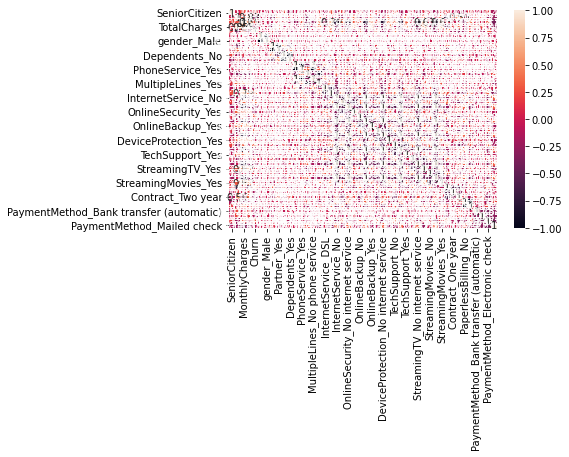

In [25]:
# Plot out tye correlation between features and labels (Churn)
df_corr = df_dummies.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Since the heat map is very hard to read let's plot this with a bar chart

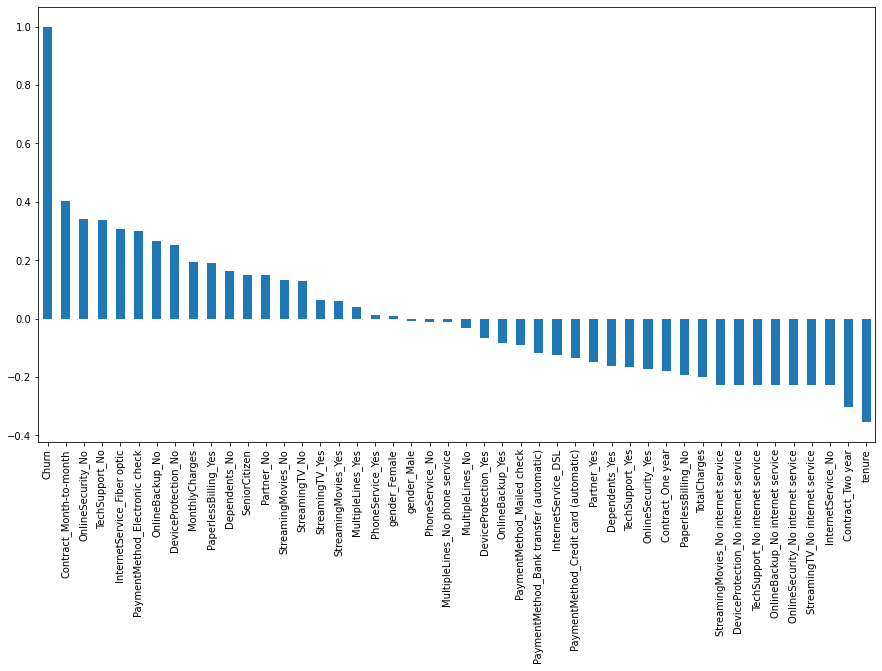

In [26]:
# Bar graph plot of correlation to Churn
plt.figure(figsize=(15,8))
df_corr['Churn'].sort_values(ascending = False).plot(kind='bar')

## D-Tale

[D-Tale](https://github.com/man-group/dtale) is an opensource data visualization tool that works well with Pandas Dataframes.

Review various segmentations of the features using D-Tale. While code can be exported from D-Tale, I will just import screen shots from the tool to explore the data.

In [ ]:
# Install dtale
!pip install -U dtale

# Clear output for this cell
from IPython.display import clear_output
clear_output()

Setup Dtale

In [ ]:
# Import dtale and set basic parameters
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

/usr/local/lib/python3.7/dist-packages/dtale/dash_application/charts.py:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/usr/local/lib/python3.7/dist-packages/dtale/dash_application/charts.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Run D-Tale on our Churn Data

Click the link to open up an interactive data exploration tool

In [ ]:
dtale.show(df_raw)

https://q6awfp5rb68-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

Using the describe section of D-Tale we get insightful graphs and data

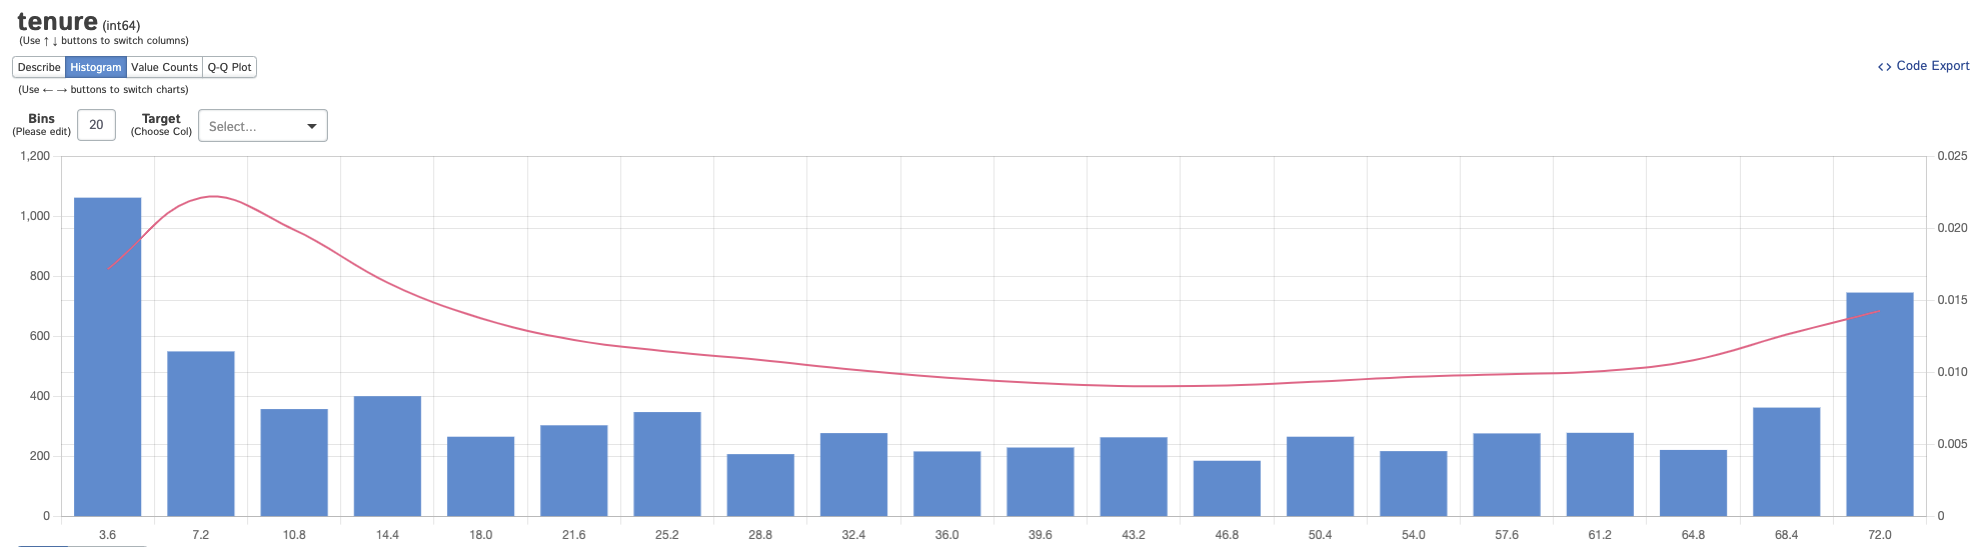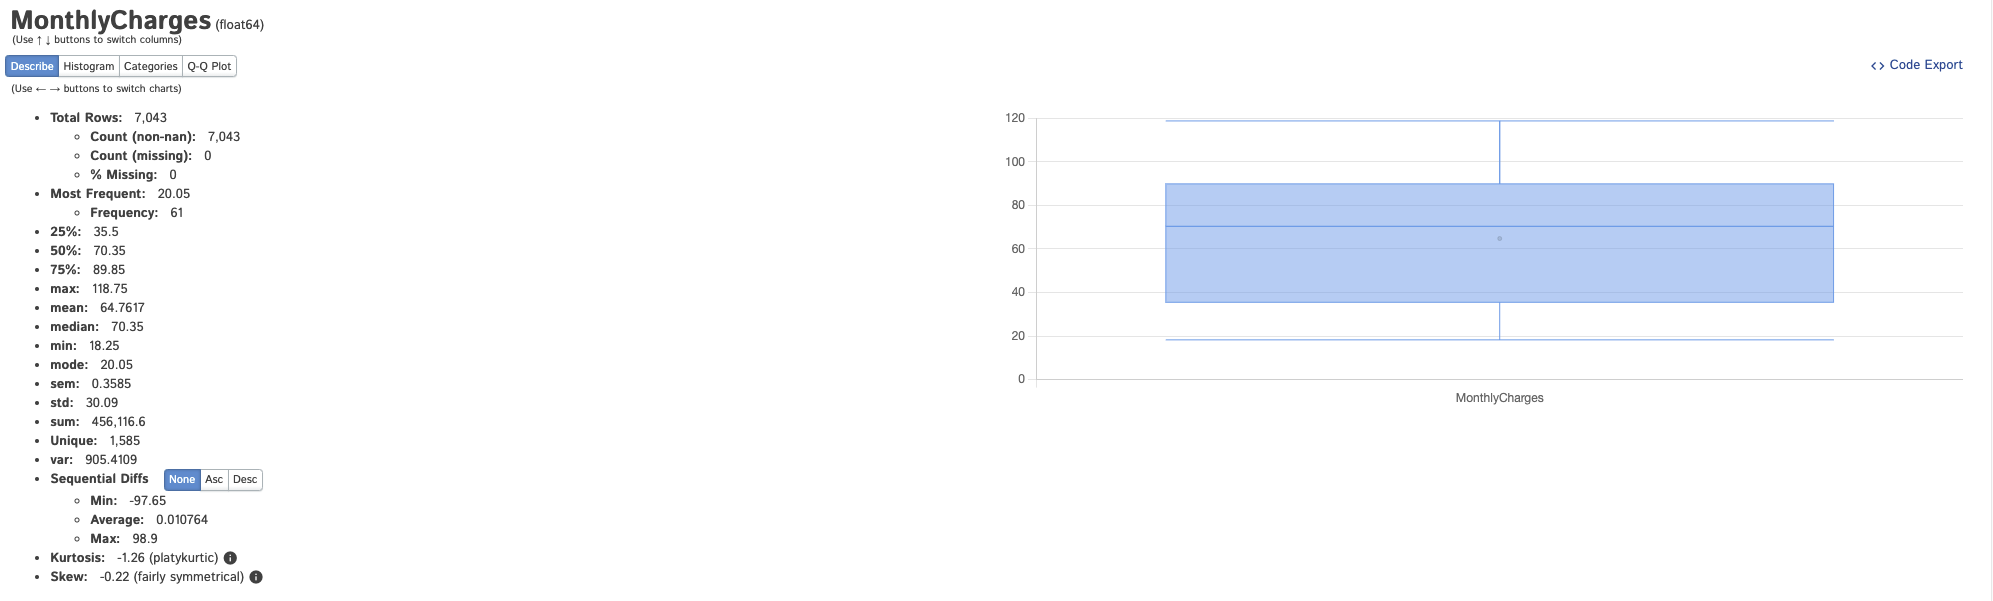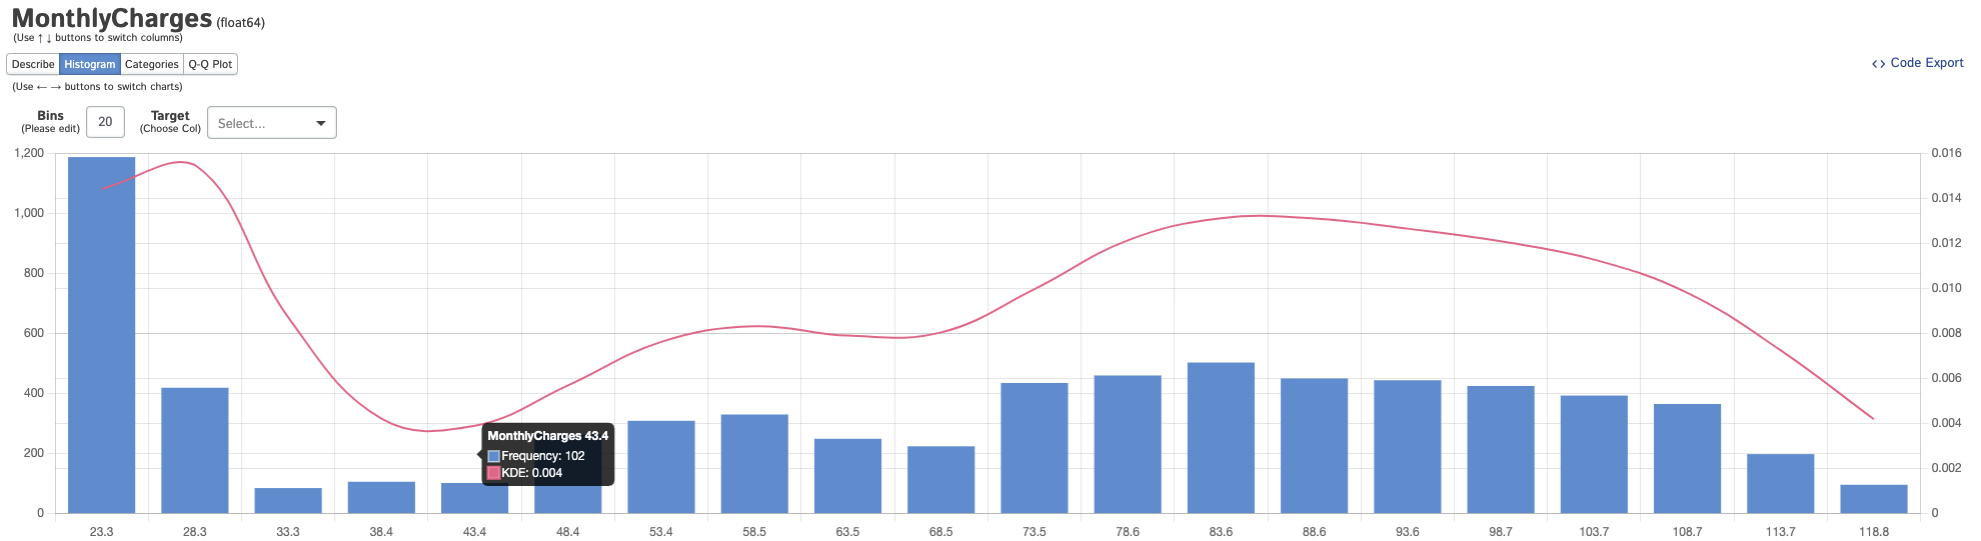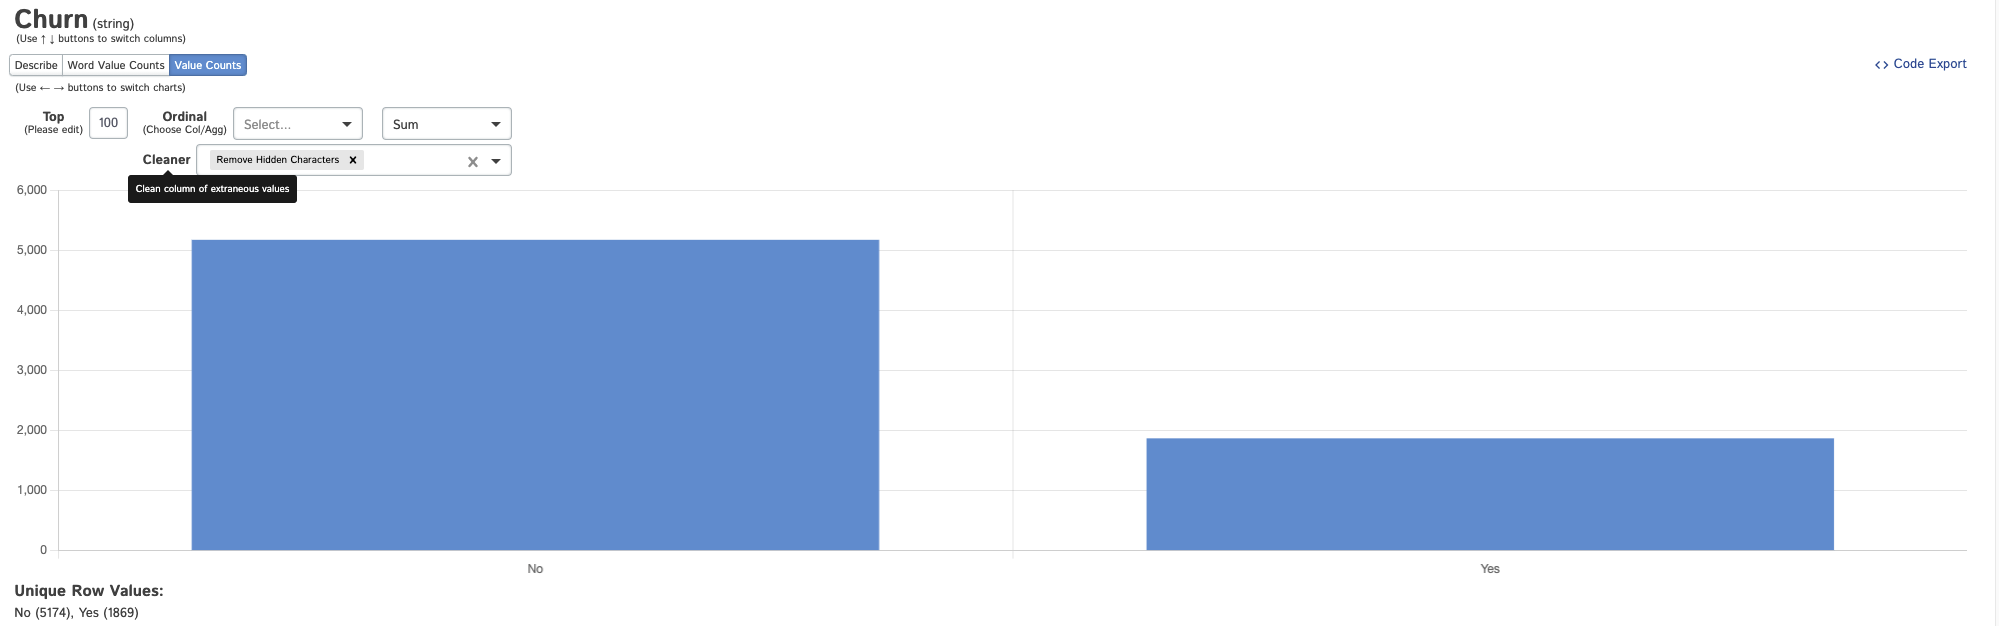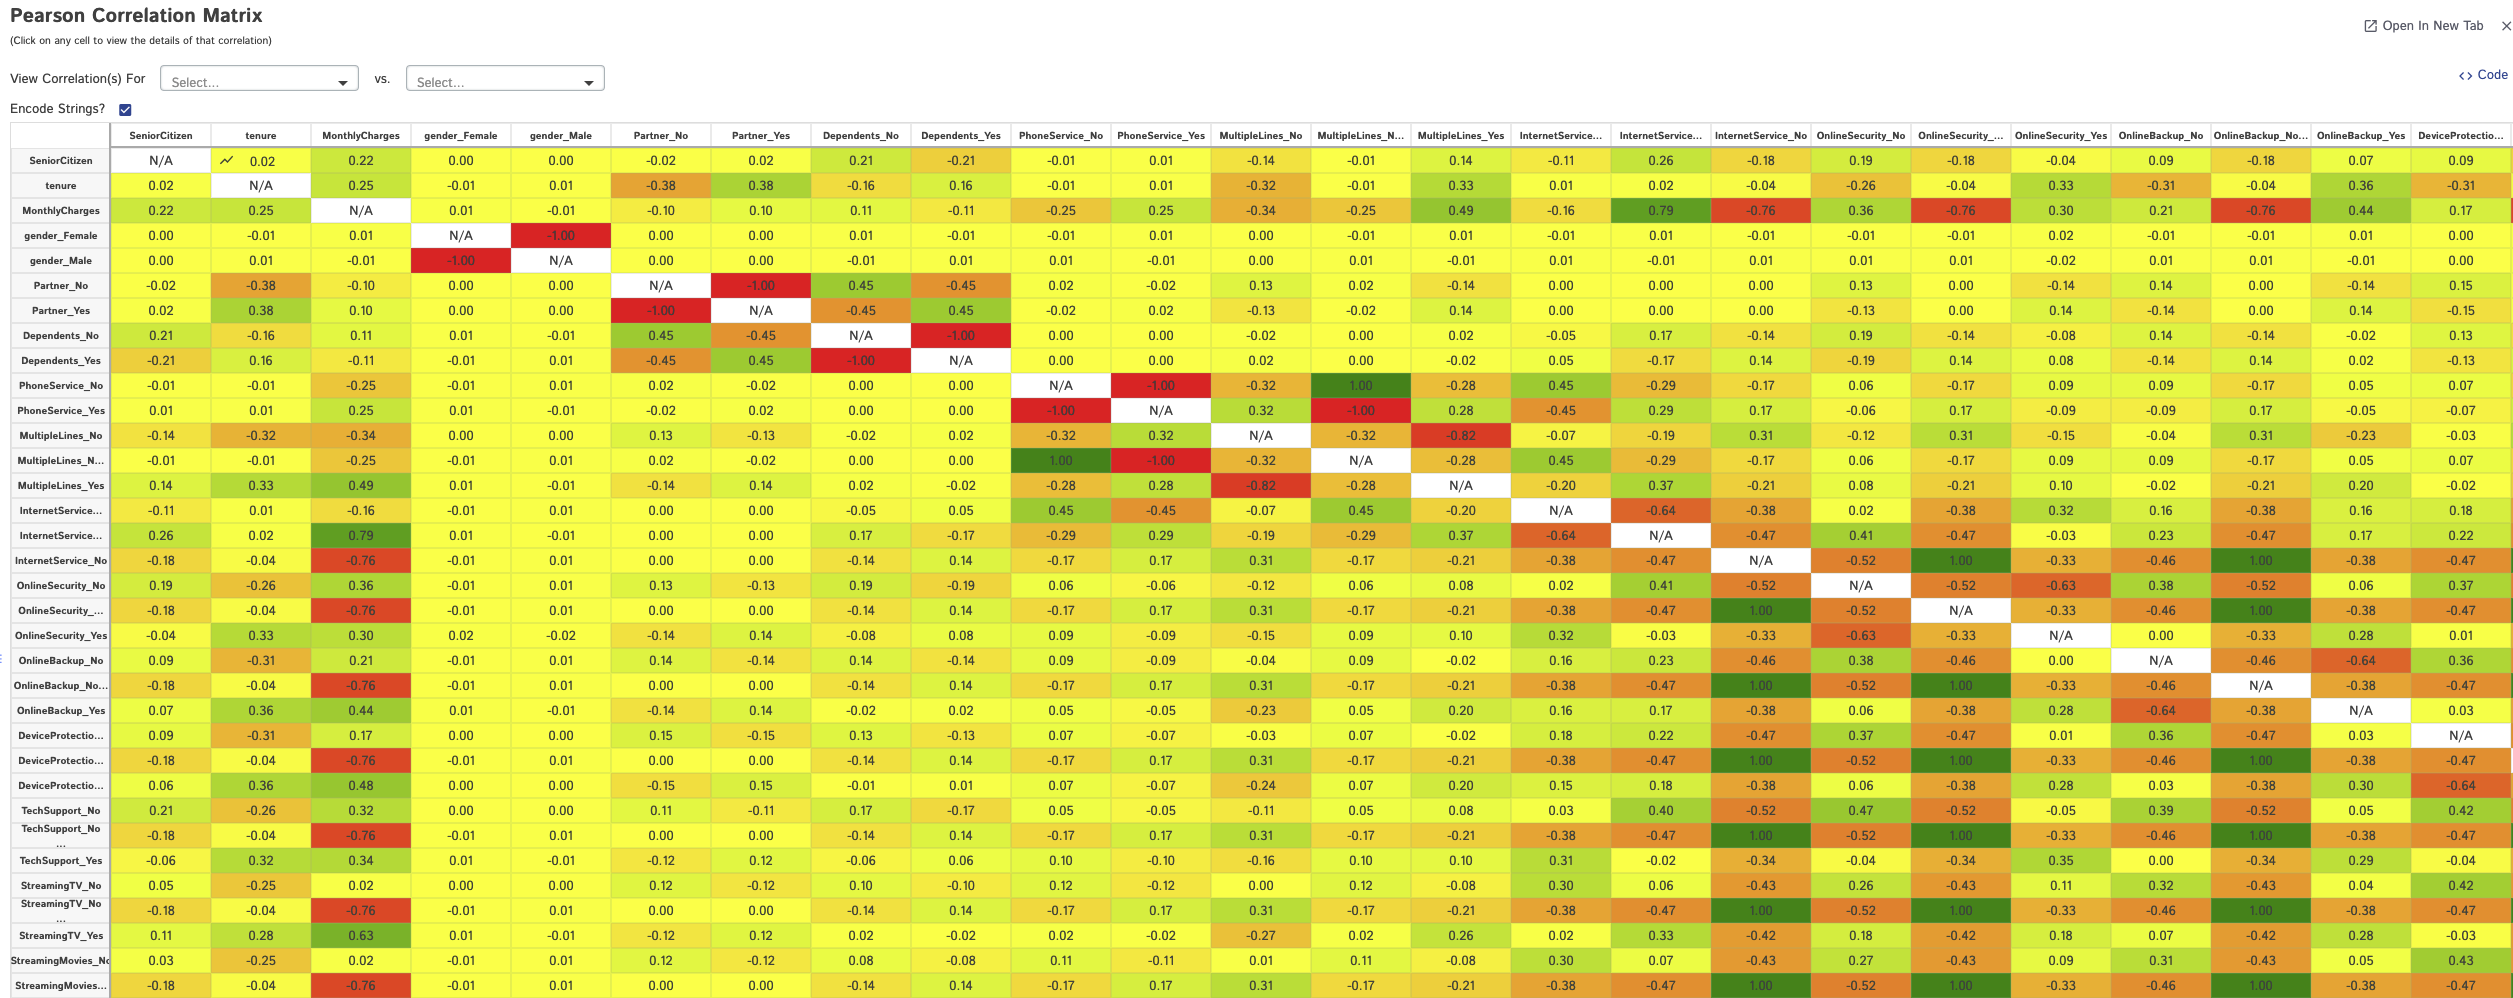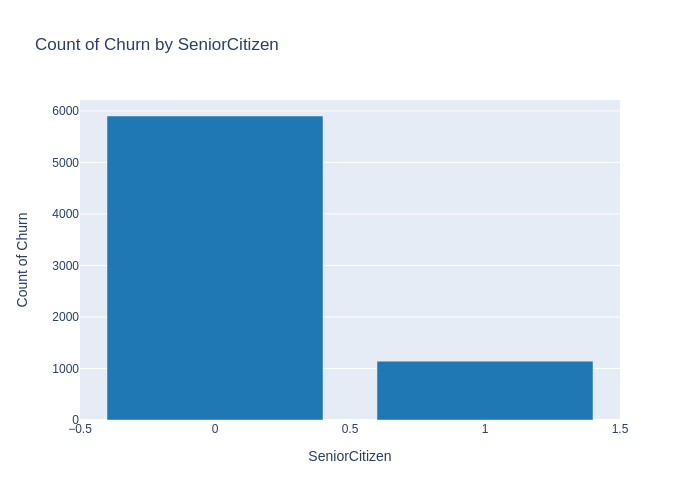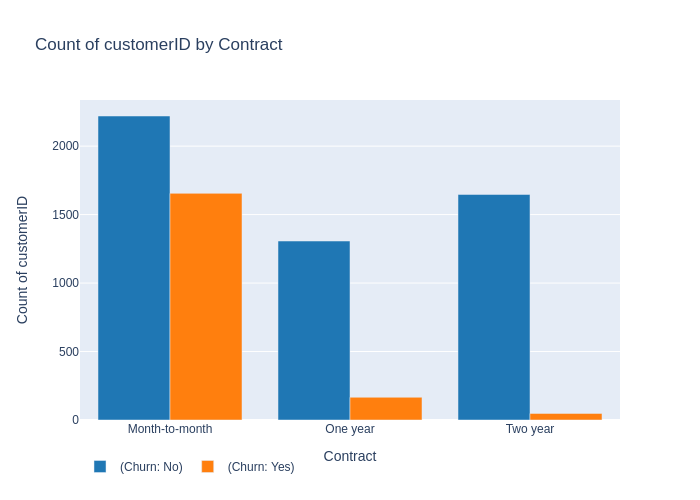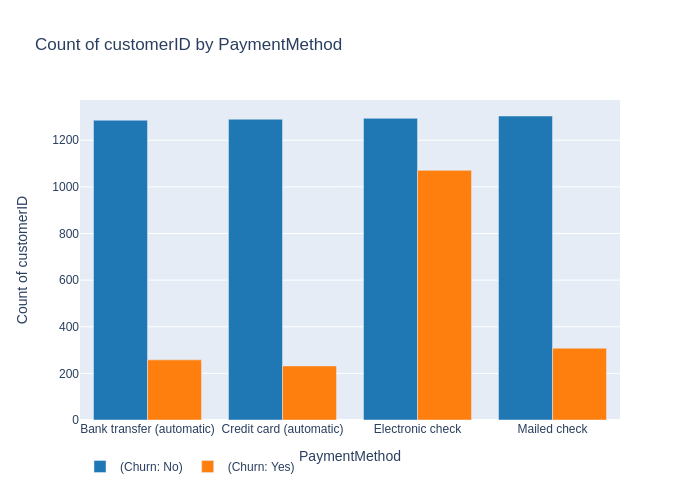

# Model Creation

Bild a relativle simple model using Logisitic Regression in Scikitlearn with a train and test split in the data.

## Train and Test Split

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Create Train and Test split

In [28]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 1, shuffle = True)
print(len(df_train), 'train examples')
print(len(df_test), 'test examples')

5625 train examples
1407 test examples


Separate the labels from the Features

In [29]:
y_train = df_train.pop('Churn')
X_train = df_train
y_test = df_test.pop('Churn')
X_test = df_test

## Fit Model

Instanciate the model

In [30]:
model = LogisticRegression()

Fit the model to the training data

In [31]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict

Ust the model to predict on the test data

In [32]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1778,0,72,24.75,1859.10,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
5036,1,16,85.35,1375.15,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
1106,0,63,97.45,6253.00,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0
1665,0,9,76.85,663.55,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
927,0,13,81.15,952.30,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


First 5 predictions on the test data set

In [33]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 0, 1, 1])

First 5 actual samples

In [34]:
y_test[:5].to_list()

[0, 1, 0, 0, 1]

Display the various high-level metrics of the model

In [35]:
test_accuracy = accuracy_score(predictions, y_test)*100
print(f'Overall model accuracy:\n{test_accuracy:.0f}%')

Overall model accuracy:
80%


In [36]:
print(f'Confusion Matrix:\n{confusion_matrix(predictions, y_test)}')

Confusion Matrix:
[[929 168]
 [112 198]]


In [37]:
print(f'Classification Report:\n{classification_report(predictions, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1097
           1       0.54      0.64      0.59       310

    accuracy                           0.80      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.81      0.80      0.81      1407

